In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [4]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [5]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [6]:
df['time'] = df.Year.apply(lambda x: str(x))

In [7]:
df.sample(15)

,Country,Year,Life expectancy at birth (years),GDP,time
2,Chile,2002,77.8,6.973681e+10,2002
7,Chile,2007,78.9,1.736060e+11,2007
13,Chile,2013,80.1,2.783840e+11,2013
3,Chile,2003,77.9,7.564346e+10,2003
34,Germany,2002,78.4,2.079140e+12,2002
36,Germany,2004,79.1,2.819250e+12,2004
53,Mexico,2005,75.3,8.663460e+11,2005
69,United States of America,2005,77.5,1.310000e+13,2005
70,United States of America,2006,77.8,1.390000e+13,2006
43,Germany,2011,80.5,3.757700e+12,2011


## GDP

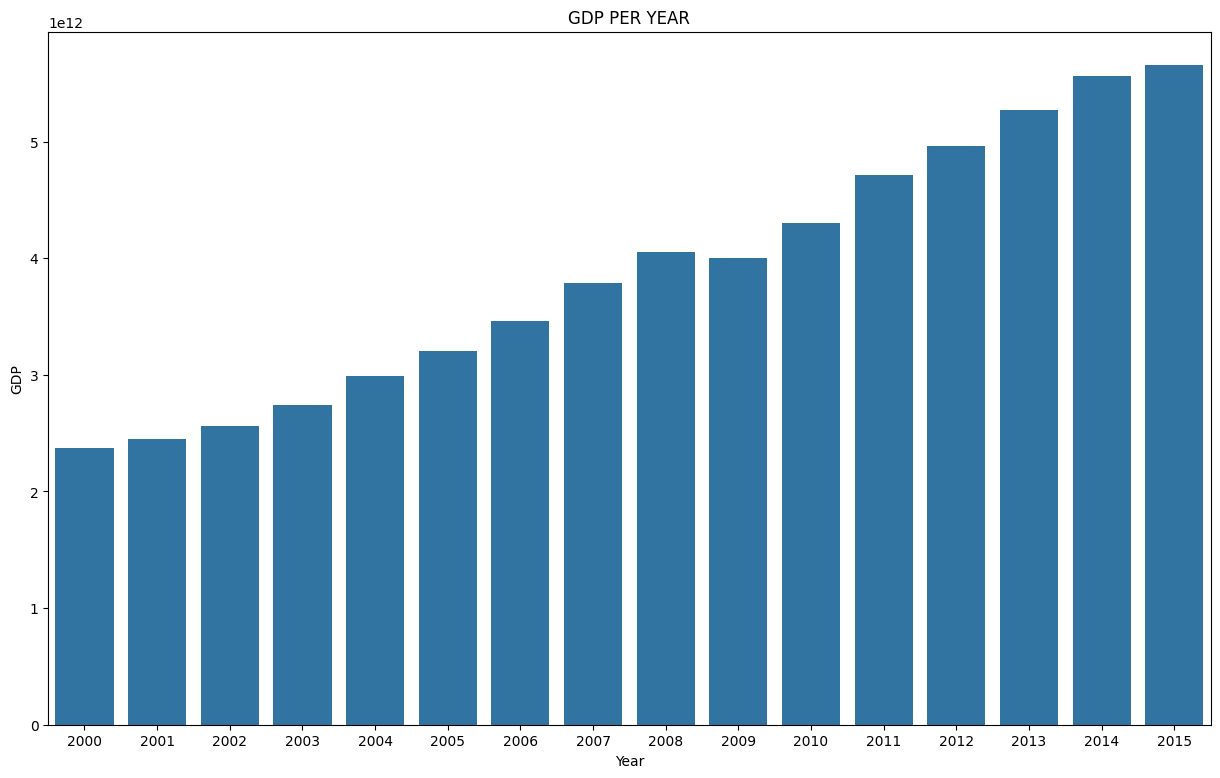

In [11]:
plt.figure(figsize=(15,9))
sns.barplot(data=df, x='time',y='GDP',order=df.time.value_counts().index,errorbar=None)
plt.title('GDP PER YEAR')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

#### Conclusion: There has been a steady increase in GDP over the years with highest GDP in 2015. 

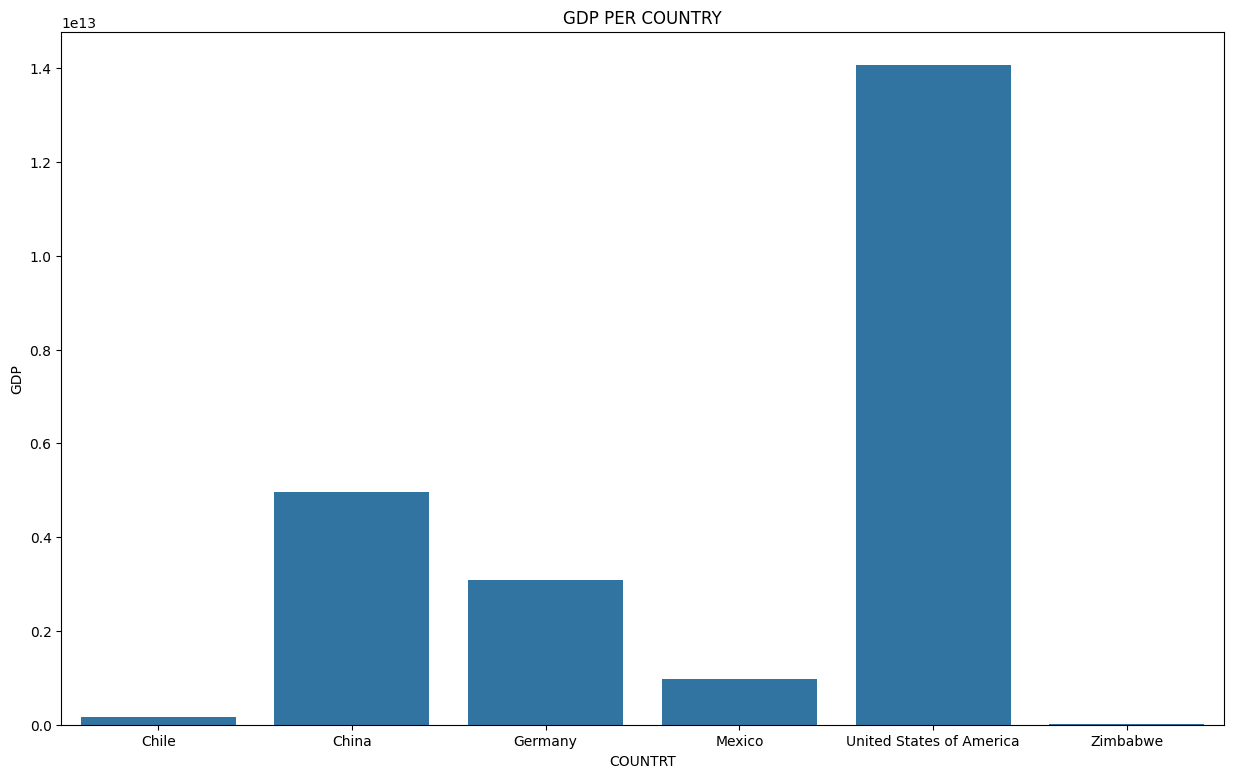

In [16]:
plt.figure(figsize=(15,9))
sns.barplot(data=df, x='Country',y='GDP', errorbar=None)
plt.title('GDP PER COUNTRY')
plt.xlabel('COUNTRT')
plt.ylabel('GDP')
plt.show()

From the bar chart, we can conclude the following:

- The United States of America has the highest GDP by a significant margin compared to other countries in the dataset.
- China follows as the second-highest, but its GDP is considerably lower than that of the USA.
- Other countries, such as Germany, Mexico, Chile, and Zimbabwe, have much smaller GDPs compared to the USA and China.

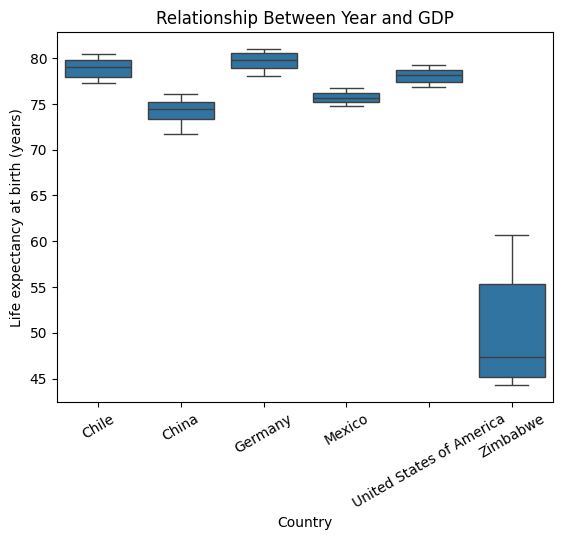

In [30]:
sns.boxplot(data=df, x='Country', y='Life expectancy at birth (years)')
plt.title('Relationship Between Year and GDP')
plt.xticks(rotation=30)
plt.show()

In [35]:
df.groupby('Country')['Life expectancy at birth (years)'].mean().round().reset_index()

,Country,Life expectancy at birth (years)
0,Chile,79.0
1,China,74.0
2,Germany,80.0
3,Mexico,76.0
4,United States of America,78.0
5,Zimbabwe,50.0


## Life Expectancy

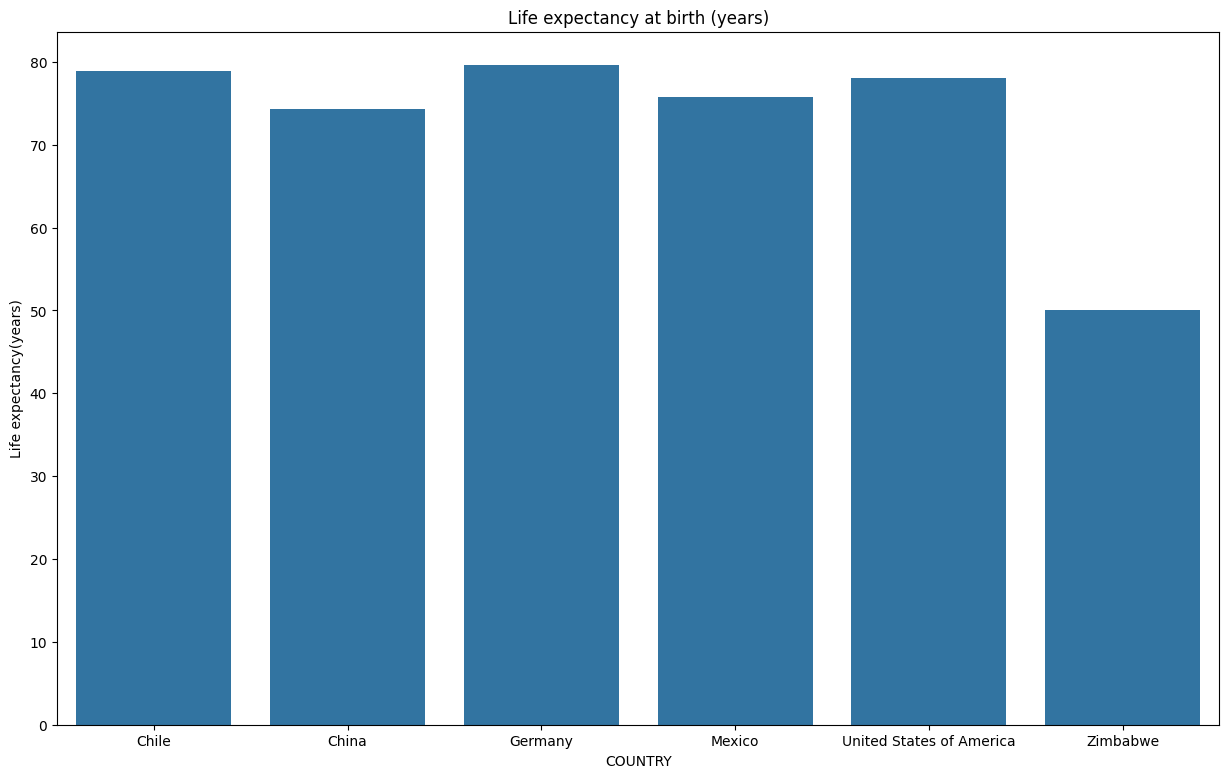

In [24]:
plt.figure(figsize=(15,9))
sns.barplot(data=df, x='Country',y='Life expectancy at birth (years)',errorbar=None)
plt.title('Life expectancy at birth (years)')
plt.ylabel('Life expectancy(years)')
plt.xlabel('COUNTRY')
plt.show()


Life Expectancy by Country:
- Countries such as Germany, United States of America, Chile, and Mexico have a similar high life expectancy, generally around 80 years.
- China follows closely, but its life expectancy is slightly lower than the above countries.
- Zimbabwe has a significantly lower life expectancy compared to the other countries, highlighting disparities in health outcomes or socioeconomic conditions.

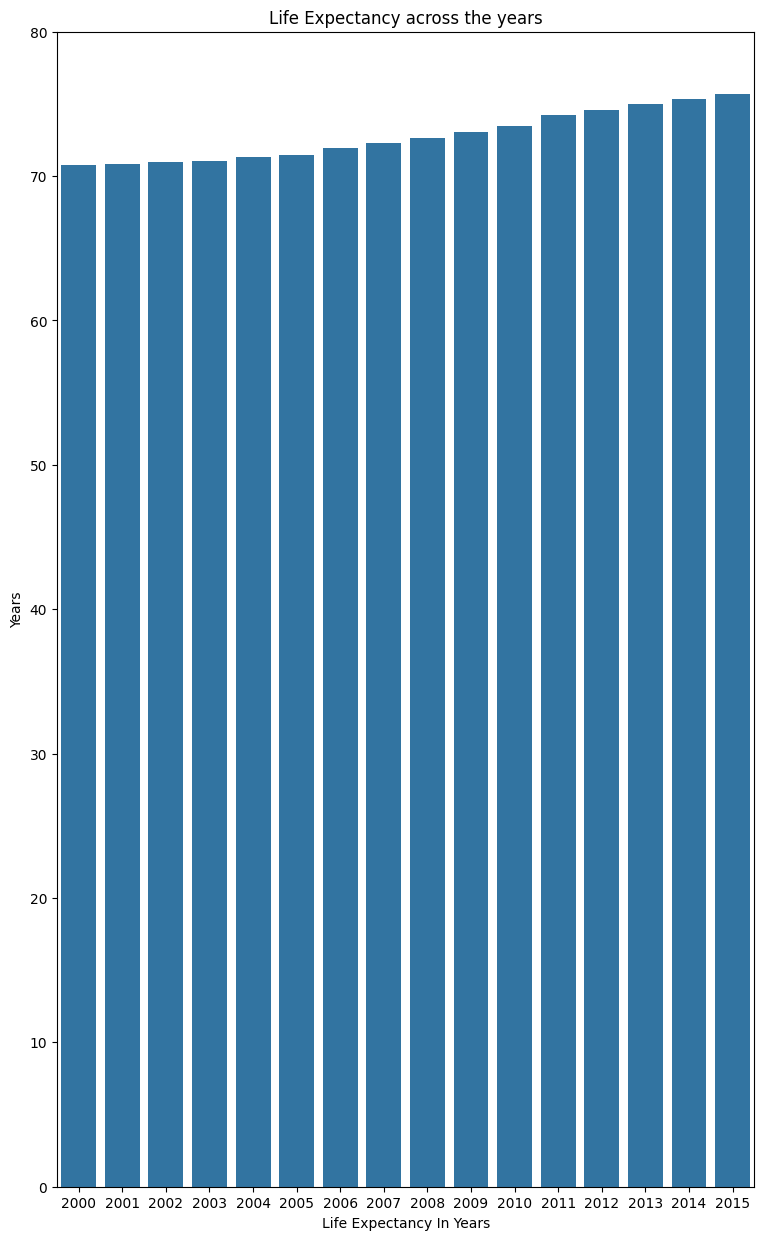

In [29]:
plt.figure(figsize=(9,15))
sns.barplot(data=df, x='Year',y= 'Life expectancy at birth (years)', errorbar=None)
plt.title('Life Expectancy across the years')
plt.xlabel('Life Expectancy In Years')
plt.ylabel('Years')
plt.ylim((0,80))
plt.show()

Life Expectancy Over Time:
- Life expectancy has steadily increased over the years from 2000 to 2015.
- This upward trend indicates general improvements in healthcare, living standards, and possibly better global access to resources.

### Distribution of Life Expectancy and GDP

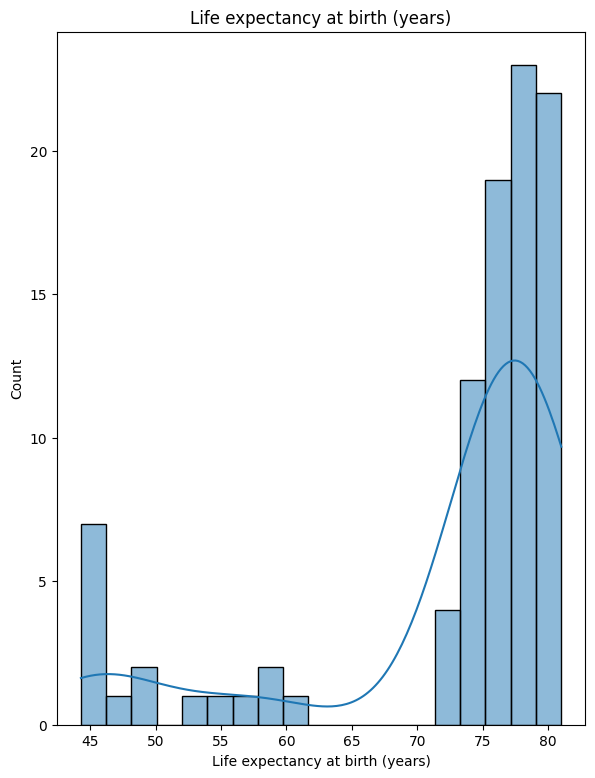

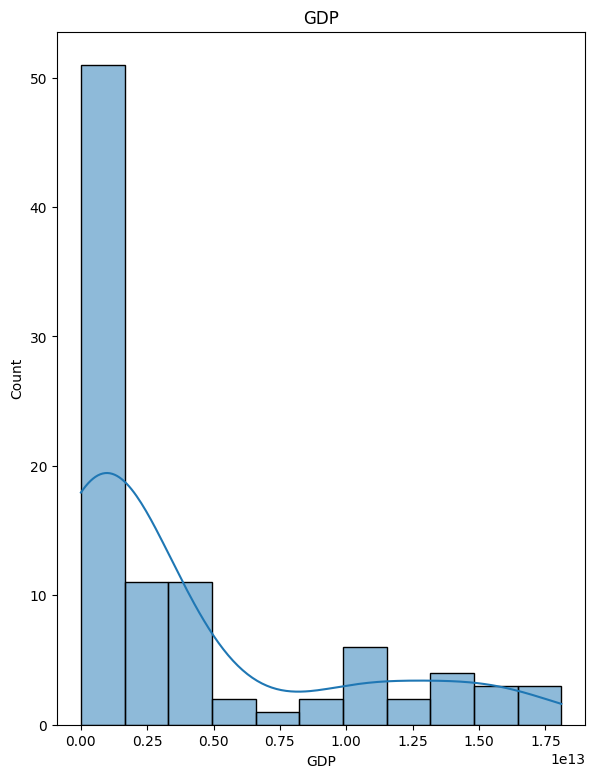

In [37]:
for column in df.columns:
    if df[column].dtypes !='O':
        if column == 'Year':
            continue
        plt.figure(figsize=(15,9))
        plt.subplot(1,2,1)
        sns.histplot(data=df,x=column,kde=True)
        plt.title(column)
        
plt.show()

GDP:
- The histogram demonstrates a significant disparity in GDP levels between countries. A large number of countries are in the lower range, which may indicate economic challenges, while a smaller number of countries have much larger GDPs, which may indicate their economic dominance.
-----------------------------------------------------------
LIfe expectancy:
- The histogram reveals a stark contrast in life expectancies across different countries, potentially reflecting disparities in development, healthcare access, and overall living conditions. The bimodal distribution and the gap between the peaks are key features that warrant further investigation and analysis.